In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import json
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
speakers = pd.read_parquet('data/speaker_attributes.parquet')

In [4]:
speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [5]:
MALE_QID = 'Q6581097'
FEMALE_QID = 'Q6581072'
male_speakers = speakers[speakers.gender.apply(lambda g: MALE_QID in g if g is not None else False)]
female_speakers = speakers[speakers.gender.apply(lambda g: FEMALE_QID in g if g is not None else False)]

In [6]:
male_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [7]:
female_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
14,"[Mary Louise Streep, Meryl Louise Streep, Stre...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1388232380,None,None,"[Q10800557, Q2259451, Q10798782, Q2405480, Q33...",[Q29552],None,Q873,Meryl Streep,None,item,[Q7066]
19,"[Indira Nehru, Indira Priyadarshini Gandhi, In...",[+1917-11-19T00:00:00Z],"[Q668, Q129286, Q1775277]",[Q6581072],1390256502,[Q1996554],None,[Q82955],[Q10225],None,Q1149,Indira Gandhi,"[Q3532192, Q3531393]",item,[Q9089]
59,None,[+1946-10-06T00:00:00Z],[Q17],[Q6581072],1392610476,None,None,"[Q33999, Q10800557]",None,None,Q3319,Yukiko Kobayashi,None,item,None
60,[Anne Sophie Mutter],[+1963-06-29T00:00:00Z],[Q183],[Q6581072],1387877604,None,None,"[Q1259917, Q16145150]",None,None,Q3374,Anne-Sophie Mutter,None,item,None
76,"[Emily Elizabeth Dickinson, Ai-mi-li Ti-chin-s...",[+1830-12-10T00:00:00Z],[Q30],[Q6581072],1390035803,None,None,"[Q36180, Q49757]",None,None,Q4441,Emily Dickinson,None,item,None


In [8]:
len(male_speakers), len(female_speakers)

(5419708, 1685185)

In [27]:
with open('data/signi-quote-count-combined_1636253317430.json') as f:
    signi_quote_count_dict = json.load(f)

In [28]:
len(signi_quote_count_dict)

624492

In [29]:
signi_quote_count_df = pd.Series(signi_quote_count_dict, name='signi_quote_count')

In [30]:
signi_male_speakers = male_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_male_speakers = signi_male_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:500]

In [31]:
signi_male_speakers

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293
18,"[Namo, Modi, Narendra Bhai, Narendra Damodarda...",[+1950-09-17T00:00:00Z],[Q668],[Q6581097],1395415052,"[Q1282294, Q6889284]",None,"[Q82955, Q36180, Q7019111, Q10429346]",[Q10230],None,Q1058,Narendra Modi,"[Q63988227, Q63988919, Q16841231, Q16251961, Q...",item,[Q9089],76404
7926268,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",59650
4545725,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,Francis,None,item,[Q9592],37218
2864,"[Jürgen Norbert Klopp, Jurgen Klopp, Juergen K...",[+1967-06-16T00:00:00Z],[Q183],[Q6581097],1389758184,None,None,"[Q937857, Q628099]",None,None,Q83106,Jürgen Klopp,None,item,[Q75809],33025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701162,None,[+1945-12-27T00:00:00Z],[Q30],[Q6581097],1341296421,None,None,"[Q3282637, Q578109]",None,None,Q1279758,Mark Johnson,None,item,None,3911
1158023,[Stanley Alan Van Gundy],[+1959-08-26T00:00:00Z],[Q30],[Q6581097],1317688323,None,None,"[Q5137571, Q3665646]",None,None,Q608639,Stan Van Gundy,None,item,None,3910
8010197,None,[+1964-05-25T00:00:00Z],[Q16],[Q6581097],1314209163,None,None,[Q11774891],None,None,Q3018779,David Shaw,None,item,None,3905
4971258,None,[+1941-07-04T00:00:00Z],None,[Q6581097],1379276285,None,None,[Q82955],[Q29468],None,Q37084447,Steve King,None,item,None,3898


In [32]:
signi_female_speakers = female_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_female_speakers = signi_female_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:500]

<font color='red'>WARNING: LONG EXECUTION!</font>

In [33]:
from functools import partial

years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_female_speakers.id.to_list() + signi_male_speakers.id.to_list() 
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/male-female-quotes500', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

Processing year 2015: 3189it [17:11,  3.09it/s]



File data/quotebank/quotes-2015.json.bz2 processed in 1034.3s



Processing year 2016: 2217it [12:09,  3.04it/s]



File data/quotebank/quotes-2016.json.bz2 processed in 731.0s



Processing year 2017: 4962it [25:09,  3.29it/s]



File data/quotebank/quotes-2017.json.bz2 processed in 1512.9s



Processing year 2018: 4589it [24:56,  3.07it/s]



File data/quotebank/quotes-2018.json.bz2 processed in 1500.7s



Processing year 2019: 3397it [18:08,  3.12it/s]



File data/quotebank/quotes-2019.json.bz2 processed in 1090.9s



Processing year 2020: 793it [04:08,  3.19it/s]



File data/quotebank/quotes-2020.json.bz2 processed in 249.5s



Output file names:
data/male-female-quotes500-2015_1639434508214.json
data/male-female-quotes500-2016_1639435240907.json
data/male-female-quotes500-2017_1639436752410.json
data/male-female-quotes500-2018_1639438253392.json
data/male-female-quotes500-2019_1639439346471.json
data/male-female-quotes500-2020_1639439598559.json


In [46]:
male_female_combined = combine_quotes_files(output_list)

In [47]:
male_female_quotes, filtered_quotes = filter_quotes(male_female_combined)

In [48]:
filtered_quotes[:5]

[{'quotation': '* $% ^ ## Derby...', 'proba': '0.8724'},
 {'quotation': 'I urge everyone to go to http://www.RailDrishti.in, and see the live camera feed of the IRCTC kitchen. You can check the hygiene of the food preparation through the website,',
  'proba': '0.8587'},
 {'quotation': 'Paris Attacks: Read Why This Woman Refuses To Change Her Facebook Profile Picture To France... https://t.co/QXeuWDiWil',
  'proba': '0.9606'},
 {'quotation': 'This is international cricket and Shikhar will play numerous number of innings. We will have to be patient. He is an impact player and we have to give him as much confidence as we can possibly. When he gets going, he will win us matches. Post-match presentation https://t.co/HBycRQDUDN #bcci via @BCCI #INDvsSA -- DC Sports (@_DCSports) November 18, 2015 He is not out of form. He is batting beautifully and hitting the ball well. We should not put too much pressure on him. Had there been some game, he could have possibly scored a hundred,',
  'proba':

In [49]:
male_female_quotes_concat = concatenate_quotes(male_female_quotes, quote_length=10000)

In [50]:
write_json_to_file('data/male-female-quotes500-concatenated', male_female_quotes_concat)

'data/male-female-quotes500-concatenated_1639440816925.json'

In [51]:
male_female_quotes_df = pd.Series(male_female_quotes_concat, name='quotations')

In [52]:
male_female_quotes_df.head()

Q1253         profound and continuing concernâ € for civili...
Q2376327      I've seen a lot. I just watch and watch and w...
Q7199798      In the last 13 months there has been a condol...
Q13427287     Market Power and Entry Analysis in Developing...
Q17811880     It is with tremendous gratitude and appreciat...
Name: quotations, dtype: object

In [53]:
male_speakers_df = signi_male_speakers.merge(male_female_quotes_df, left_on='id', right_index=True, how='inner')

In [54]:
male_speakers_df.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count,quotations
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293,Under what pretext did Israel's survival beco...
18,"[Namo, Modi, Narendra Bhai, Narendra Damodarda...",[+1950-09-17T00:00:00Z],[Q668],[Q6581097],1395415052,"[Q1282294, Q6889284]",None,"[Q82955, Q36180, Q7019111, Q10429346]",[Q10230],None,Q1058,Narendra Modi,"[Q63988227, Q63988919, Q16841231, Q16251961, Q...",item,[Q9089],76404,"One, Africa will be at the top of our priorit..."
7926268,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",59650,Namaste! Thank you Prime Minister Modi for yo...
4545725,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,Francis,None,item,[Q9592],37218,It must never be forgotten that political and...
2864,"[Jürgen Norbert Klopp, Jurgen Klopp, Juergen K...",[+1967-06-16T00:00:00Z],[Q183],[Q6581097],1389758184,None,None,"[Q937857, Q628099]",None,None,Q83106,Jürgen Klopp,None,item,[Q75809],33025,Rhian Brewster is just 18 years old. During t...


In [55]:
female_speakers_df = signi_female_speakers.merge(male_female_quotes_df, left_on='id', right_index=True, how='inner')

In [56]:
female_speakers_df.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count,quotations
1135081,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],[Q30],[Q6581072],1393846565,None,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,Hillary Clinton,"[Q699872, Q4791768]",item,[Q33203],28126,Donors in Saudi Arabia constitute the most si...
6800188,"[Nancy Patricia D'Alesandro Pelosi, Nancy Patr...",[+1940-03-26T00:00:00Z],[Q30],[Q6581072],1392905094,[Q974693],P000197,[Q82955],[Q29552],None,Q170581,Nancy Pelosi,"[Q28404971, Q28122293, Q52494157]",item,[Q1841],20783,Good evening. I appreciate the opportunity to...
1145081,"[Theresa Mary Brasier, Prime Minister Theresa ...",[+1956-10-01T00:00:00Z],[Q145],[Q6581072],1392235818,[Q7994501],None,[Q82955],[Q9626],None,Q264766,Theresa May,"[Q30173038, Q215622, Q590740, Q428598, Q918503...",item,[Q6423963],19450,"The Cabinet has just had a long, detailed and..."
4544778,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1394365746,[Q49078],W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,Elizabeth Warren,[Q28220813],item,[Q33203],16937,We need to talk about what we believe: • We b...
2284181,[Mamata Bandyopadhyay],"[+1955-01-05T00:00:00Z, +1960-10-05T00:00:00Z]",[Q668],[Q6581072],1377224970,None,None,"[Q82955, Q1028181, Q36834, Q822146]","[Q10225, Q912899]",None,Q465041,Mamata Banerjee,None,item,[Q9089],16321,It is reported that in many examination centr...


In [57]:
male_speakers_df[['id', 'quotations']].to_csv('data/male_quotes500.csv', index=False)

In [58]:
female_speakers_df[['id', 'quotations']].to_csv('data/female_quotes500.csv', index=False)

In [59]:
male_quotes_liwc = pd.read_csv('data/male_quotes500_liwc.csv')
female_quotes_liwc = pd.read_csv('data/female_quotes500_liwc.csv')

In [60]:
male_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q22686,Under what pretext did Israel's survival beco...,1683,21.58,25.43,66.84,7.49,0.65,3.09,3.74,...,4.04,0.18,0.06,0.24,0.00,2.97,0.0,1.19,0.00,0.06
1,Q1058,"One, Africa will be at the top of our priorit...",1757,22.24,22.08,61.24,5.29,0.74,2.50,3.24,...,2.68,0.23,0.57,0.00,0.00,0.68,0.0,0.63,0.68,0.28
2,Q76,Namaste! Thank you Prime Minister Modi for yo...,1710,21.38,23.04,68.48,7.66,1.93,3.86,5.79,...,5.44,0.00,0.18,0.00,0.06,0.41,0.0,2.05,0.00,0.00
3,Q450675,It must never be forgotten that political and...,1761,19.79,20.44,73.03,7.16,1.65,1.59,3.24,...,6.87,0.51,0.34,0.62,0.34,0.68,0.0,0.40,0.11,0.62
4,Q83106,Rhian Brewster is just 18 years old. During t...,1793,17.58,16.68,74.90,11.10,1.17,3.51,4.68,...,4.24,0.11,0.11,0.28,0.11,3.85,0.0,1.84,0.11,9.70


In [61]:
male_personality = predict_personality(male_quotes_liwc)
female_personality = predict_personality(female_quotes_liwc)

In [62]:
male_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,0.653831,0.393681,1.684541,-0.416271,-0.043090,-0.535734,0.095104,2.901841,4.860519,4.860278,...,2.835919,1.138677,1.834311,-0.772972,2.011175,0.630115,1.415950,-0.344240,-0.811962,0.403087
1,0.061088,-0.071468,1.141742,-1.132739,-0.557964,-0.825372,-0.144957,2.676373,5.295333,4.724141,...,4.204391,1.368455,2.303234,-0.083134,2.679588,0.887011,1.816737,-0.003491,-0.071744,1.043267
2,0.881848,0.684800,1.812147,-0.517812,-0.043196,-0.452747,0.583726,3.058496,5.130206,5.284213,...,3.417897,1.072869,2.129279,-0.838343,2.150607,1.033460,1.640677,-0.487366,-0.785797,0.483270
3,1.158200,0.559545,2.145749,0.227255,0.164464,-0.197769,0.214040,3.104805,4.285311,4.303567,...,2.412497,1.013444,2.098923,-1.489420,1.677183,0.517837,0.762050,-1.426858,-1.310748,0.147964
4,0.759162,0.678860,1.947304,-0.200721,0.059427,-0.421840,0.362344,3.274971,5.643163,6.419120,...,2.538383,1.379207,1.485347,-0.916230,1.567009,0.841368,1.894064,-0.395322,-0.867206,0.339430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.401419,-0.104155,1.455056,-0.716146,0.362906,-0.494504,0.010369,2.138224,5.049349,4.426366,...,3.648554,1.487253,1.999298,-0.356436,2.420129,1.003820,2.013331,-0.037967,-0.440555,0.745147
496,0.974319,0.713407,2.050699,0.040391,0.253918,-0.020075,0.705691,3.294490,5.032493,6.089040,...,2.508741,0.945322,1.383229,-1.570653,1.155655,0.798589,1.317519,-1.312636,-1.391367,0.218170
497,0.756642,0.553070,1.920745,-0.420554,0.637727,-0.206114,0.583132,2.633405,5.002924,5.860366,...,2.720160,1.139697,1.295030,-0.875365,1.680247,1.057074,1.816448,-0.279204,-0.698614,0.478009
498,0.522706,0.101002,1.591763,-0.745067,-0.059035,-0.440417,0.246633,2.511666,4.992875,4.744911,...,3.531788,1.089571,1.885453,-0.769574,2.114547,0.987629,1.702083,-0.580097,-0.706859,0.639367


In [63]:
male_personality['gender'] = 'male'
female_personality['gender'] = 'female'
male_female_personality = pd.concat([male_personality, female_personality]).reset_index(drop=True)

In [64]:
male_female_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,gender
0,0.653831,0.393681,1.684541,-0.416271,-0.043090,-0.535734,0.095104,2.901841,4.860519,4.860278,...,1.138677,1.834311,-0.772972,2.011175,0.630115,1.415950,-0.344240,-0.811962,0.403087,male
1,0.061088,-0.071468,1.141742,-1.132739,-0.557964,-0.825372,-0.144957,2.676373,5.295333,4.724141,...,1.368455,2.303234,-0.083134,2.679588,0.887011,1.816737,-0.003491,-0.071744,1.043267,male
2,0.881848,0.684800,1.812147,-0.517812,-0.043196,-0.452747,0.583726,3.058496,5.130206,5.284213,...,1.072869,2.129279,-0.838343,2.150607,1.033460,1.640677,-0.487366,-0.785797,0.483270,male
3,1.158200,0.559545,2.145749,0.227255,0.164464,-0.197769,0.214040,3.104805,4.285311,4.303567,...,1.013444,2.098923,-1.489420,1.677183,0.517837,0.762050,-1.426858,-1.310748,0.147964,male
4,0.759162,0.678860,1.947304,-0.200721,0.059427,-0.421840,0.362344,3.274971,5.643163,6.419120,...,1.379207,1.485347,-0.916230,1.567009,0.841368,1.894064,-0.395322,-0.867206,0.339430,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.219487,0.620305,2.132442,0.016097,1.155183,-0.272890,0.391875,2.223490,4.147432,3.861681,...,1.112682,2.062516,-0.967124,1.796951,0.932800,1.303126,-0.302615,-0.959288,0.318286,female
996,1.246829,0.947620,2.245113,-0.202955,0.983734,0.037159,0.859648,2.571780,4.469333,5.171989,...,1.175869,1.678257,-0.864796,1.641546,1.409939,1.437770,-0.725862,-0.860245,0.517311,female
997,1.454855,1.249317,2.244945,0.242395,0.084644,0.480843,1.200073,3.327949,4.658631,6.255693,...,1.146396,1.371729,-1.389945,1.223511,1.393831,1.076022,-1.315198,-0.913899,-0.154047,female
998,1.226796,1.219823,2.159908,-0.033173,0.382980,0.294496,1.161600,3.273170,4.924988,6.244059,...,1.165189,1.409519,-1.105477,1.276420,1.335861,1.444384,-0.866901,-0.877666,0.163631,female


In [65]:
for attr in PERSONALITY_ATTRS:
    male_female_personality[attr] = (male_female_personality[attr] - male_female_personality[attr].min()) / (male_female_personality[attr].max() - male_female_personality[attr].min())

In [66]:
male_female_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,gender
0,0.444951,0.506500,0.481278,0.581851,0.357581,0.281145,0.412866,0.705507,0.520936,0.548610,...,0.190543,0.425436,0.380044,0.563953,0.260909,0.320197,0.448285,0.358958,0.330454,male
1,0.287246,0.399256,0.323168,0.395128,0.224726,0.151944,0.344133,0.664085,0.634256,0.524753,...,0.284625,0.655728,0.535480,0.749796,0.411484,0.432325,0.538465,0.518574,0.516294,male
2,0.505617,0.573620,0.518448,0.555388,0.357554,0.318163,0.552765,0.734286,0.591221,0.622902,...,0.163598,0.570297,0.365315,0.602720,0.497322,0.383069,0.410406,0.364600,0.353731,male
3,0.579143,0.544741,0.615621,0.749565,0.411137,0.431903,0.446919,0.742793,0.371027,0.451051,...,0.139267,0.555389,0.218612,0.471091,0.195099,0.137256,0.161766,0.251404,0.256394,male
4,0.472975,0.572251,0.557817,0.638027,0.384034,0.331950,0.489380,0.774055,0.724906,0.821787,...,0.289027,0.254055,0.347765,0.440459,0.384731,0.453959,0.434766,0.347046,0.311975,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.595449,0.558750,0.611745,0.694534,0.666776,0.398394,0.497835,0.580885,0.335094,0.373613,...,0.179899,0.537509,0.336297,0.504391,0.438322,0.288632,0.459301,0.327190,0.305837,female
996,0.602724,0.634216,0.644565,0.637445,0.622537,0.536699,0.631765,0.644870,0.418987,0.603236,...,0.205771,0.348795,0.359354,0.461183,0.717989,0.326302,0.347287,0.348547,0.363613,female
997,0.658071,0.703775,0.644516,0.753511,0.390541,0.734616,0.729233,0.783788,0.468321,0.793147,...,0.193703,0.198256,0.241026,0.344954,0.708547,0.225095,0.191317,0.336977,0.168722,female
998,0.597394,0.696975,0.619746,0.681693,0.467522,0.651491,0.718218,0.773724,0.537738,0.791109,...,0.201398,0.216815,0.305123,0.359665,0.674569,0.328152,0.309961,0.344790,0.260942,female


In [67]:
overall_male_personality = male_female_personality[male_female_personality.gender == 'male'].mean(axis=0, numeric_only=True)
overall_female_personality = male_female_personality[male_female_personality.gender == 'female'].mean(axis=0, numeric_only=True)

In [68]:
overall_personality = pd.DataFrame([overall_male_personality, overall_female_personality], index=['male', 'female'])

In [69]:
overall_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
male,0.443666,0.486371,0.486533,0.597200,0.407578,0.359254,0.465116,0.679422,0.515979,0.586009,...,0.373405,0.197355,0.414981,0.366262,0.543633,0.391023,0.362908,0.382554,0.357472,0.361426
female,0.547566,0.593358,0.566182,0.678488,0.482597,0.477996,0.574879,0.715492,0.453169,0.623733,...,0.317994,0.167476,0.417296,0.310568,0.462957,0.467584,0.283289,0.350628,0.326153,0.289669


<AxesSubplot:>

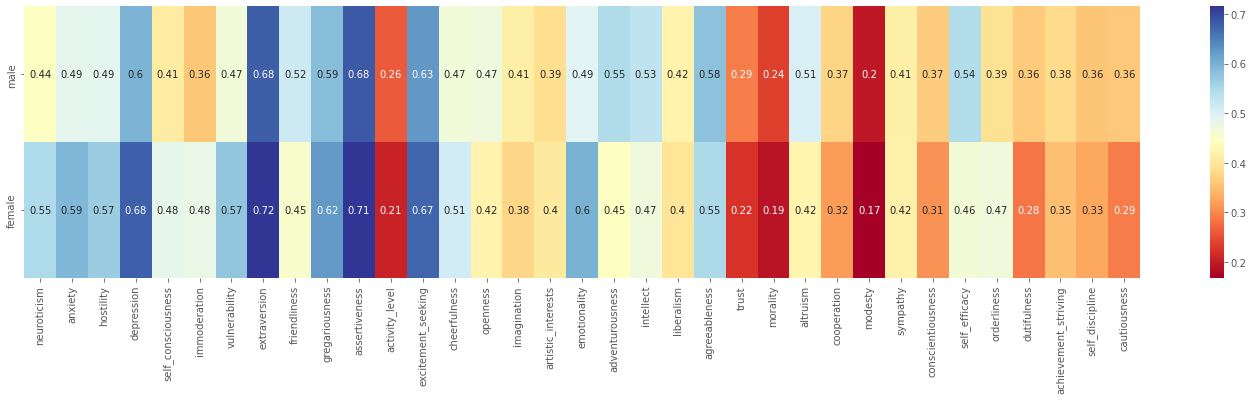

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(overall_personality, ax=ax, annot=True, cmap='RdYlBu')

/Users/mismayil/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


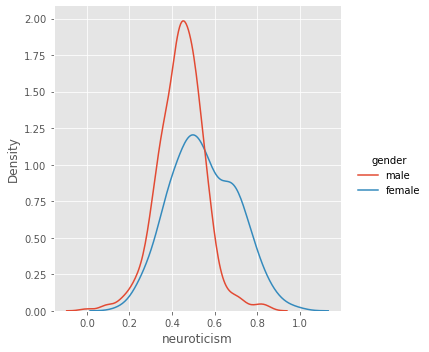

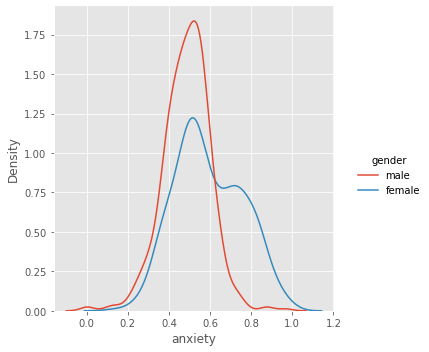

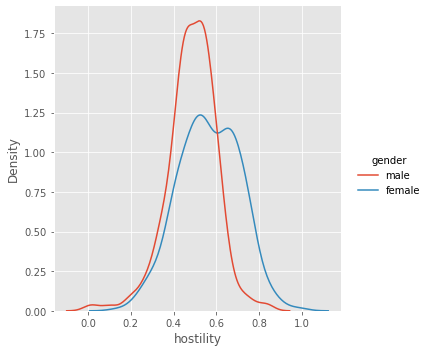

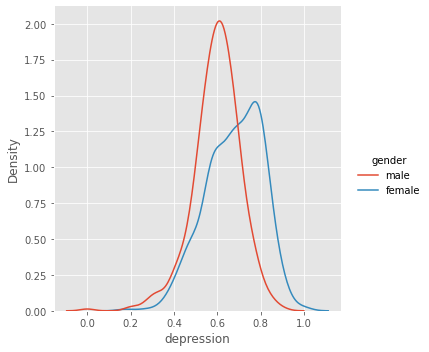

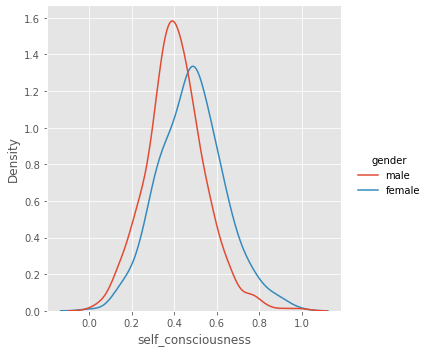

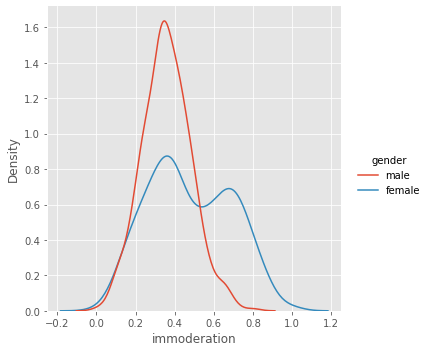

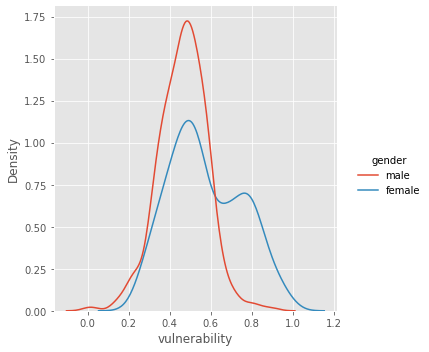

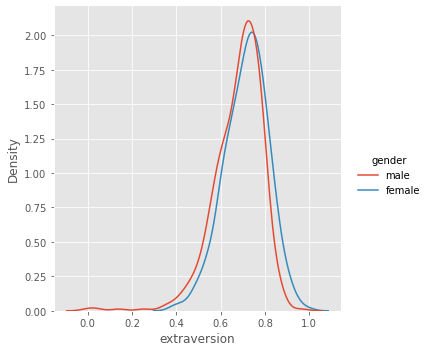

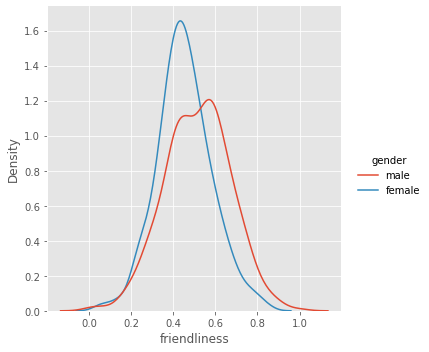

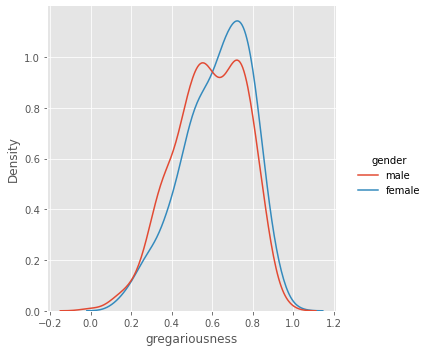

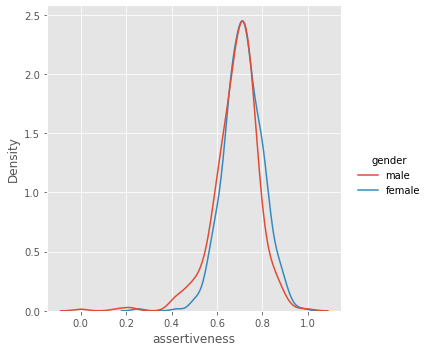

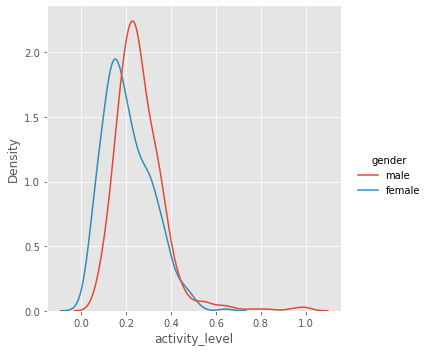

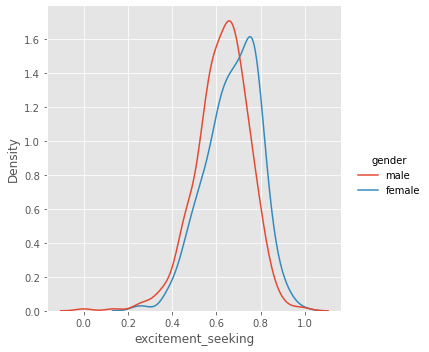

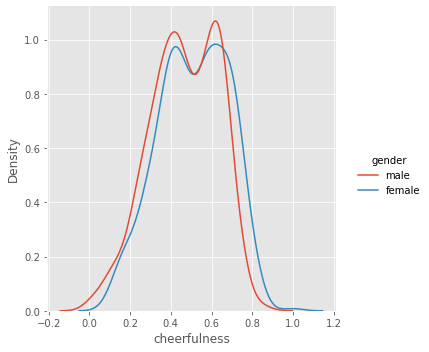

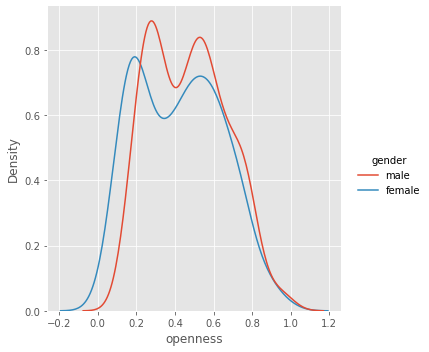

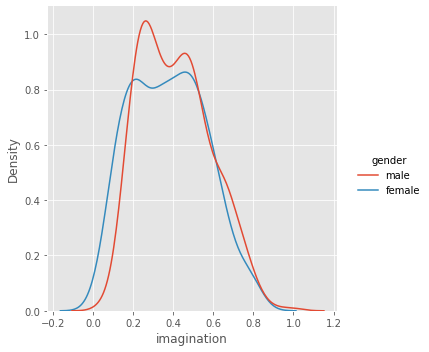

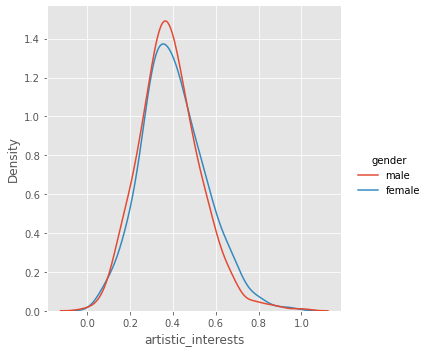

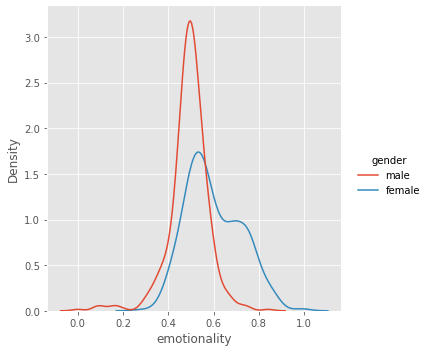

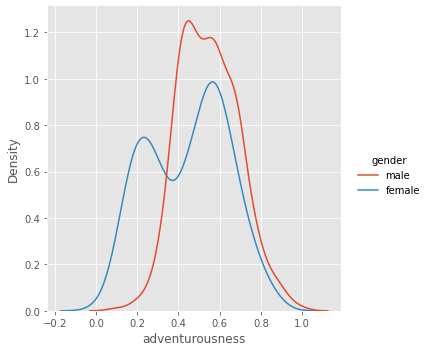

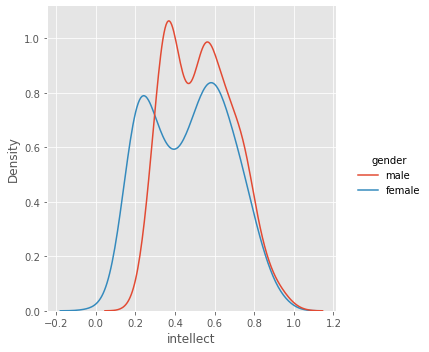

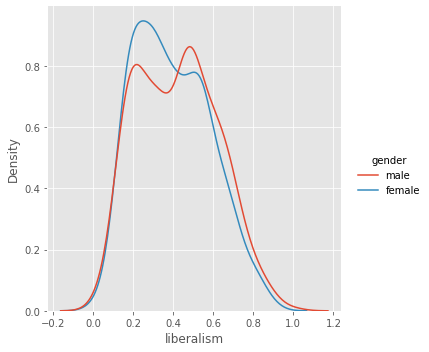

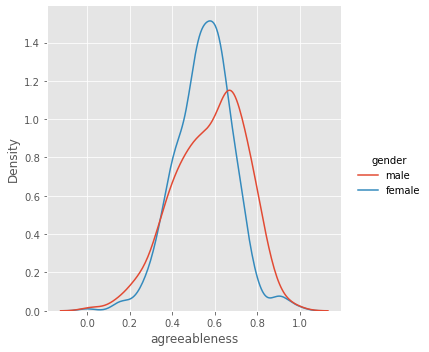

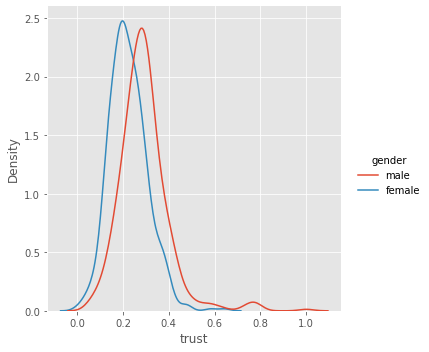

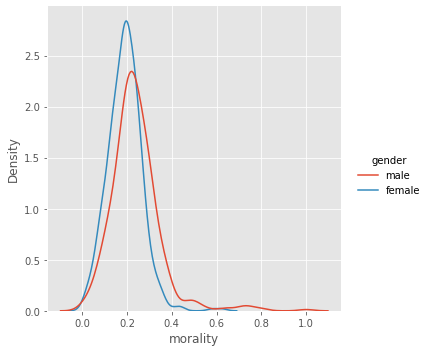

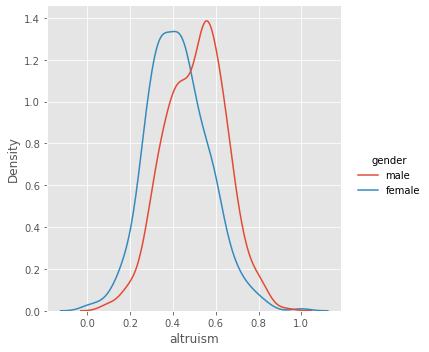

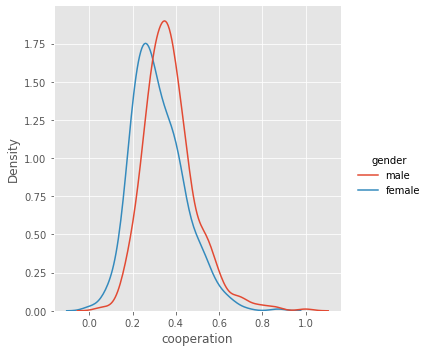

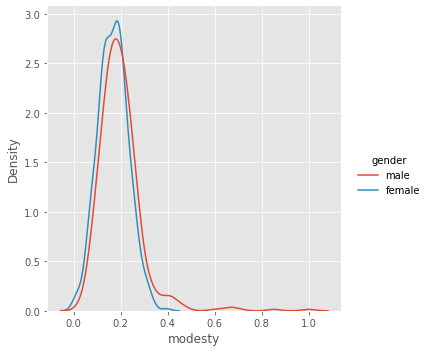

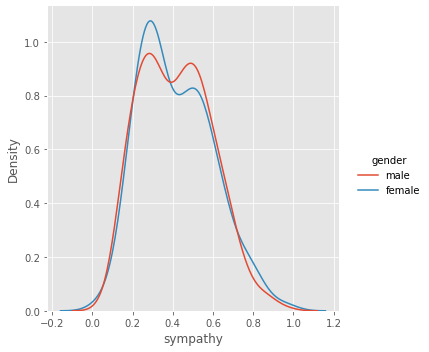

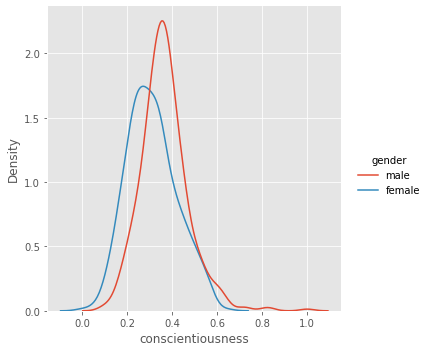

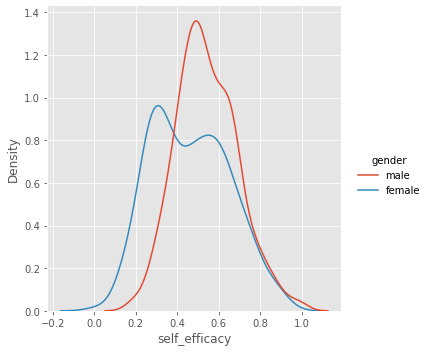

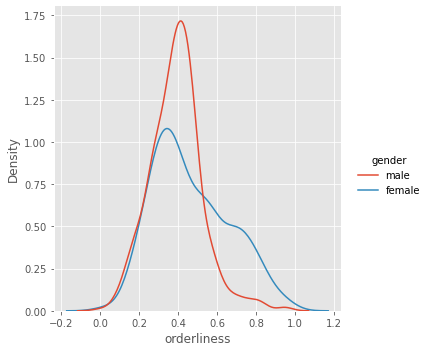

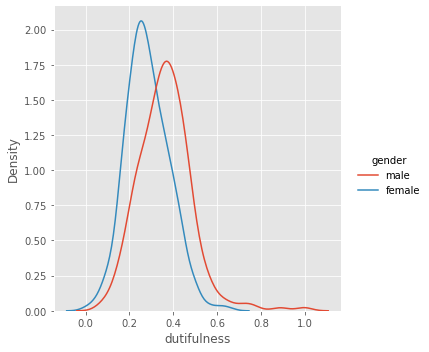

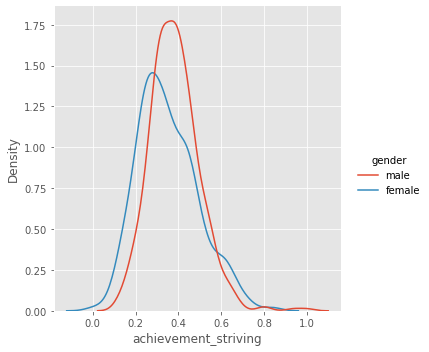

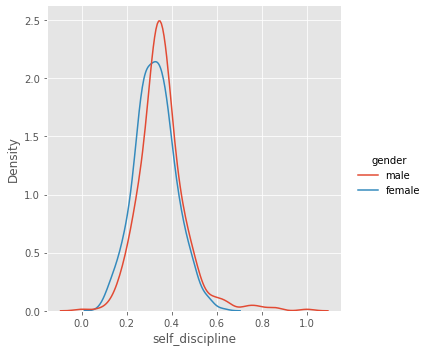

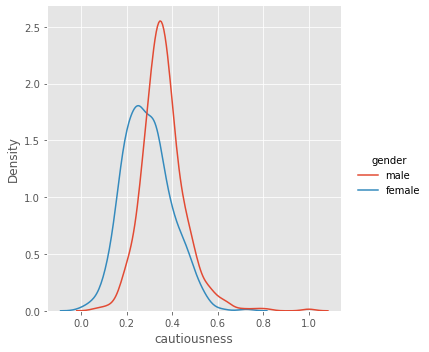

In [71]:
for i, attr in enumerate(PERSONALITY_ATTRS):
    sns.displot(male_female_personality, x=attr, hue='gender', kind='kde')

In [106]:
POLITICIAN_QID = 'Q82955'
male_politicians_df = male_speakers_df[male_speakers_df.occupation.apply(lambda o: POLITICIAN_QID in o if o is not None else False)]
female_politicians_df = female_speakers_df[female_speakers_df.occupation.apply(lambda o: POLITICIAN_QID in o if o is not None else False)]

In [107]:
len(male_politicians_df), len(female_politicians_df)

(55, 59)

In [108]:
male_politicians_df[['id', 'quotations']].to_csv('data/male_politician_quotes.csv', index=False)
female_politicians_df[['id', 'quotations']].to_csv('data/female_politician_quotes.csv', index=False)

In [32]:
male_politicians_liwc = pd.read_csv('data/male_politician_quotes_liwc.csv')
female_politicians_liwc = pd.read_csv('data/female_politician_quotes_liwc.csv')

In [33]:
male_politician_personality = predict_personality(male_politicians_liwc)
female_politician_personality = predict_personality(female_politicians_liwc)

In [34]:
male_politician_personality['gender'] = 'male'
female_politician_personality['gender'] = 'female'
male_female_politician_personality = pd.concat([male_politician_personality, female_politician_personality]).reset_index()

/Users/mismayil/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


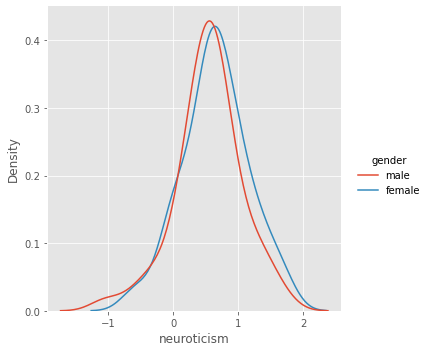

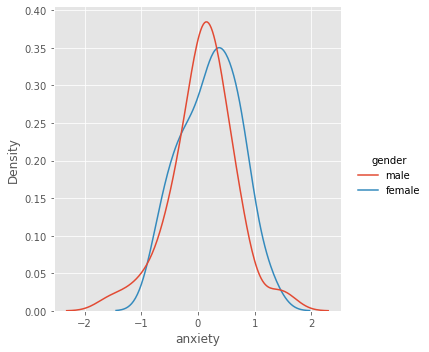

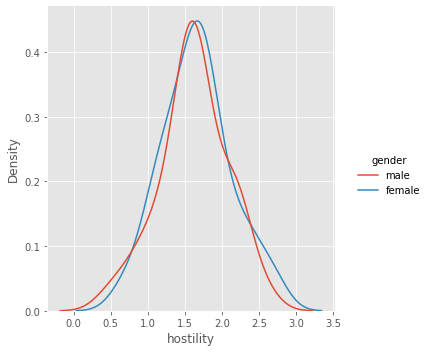

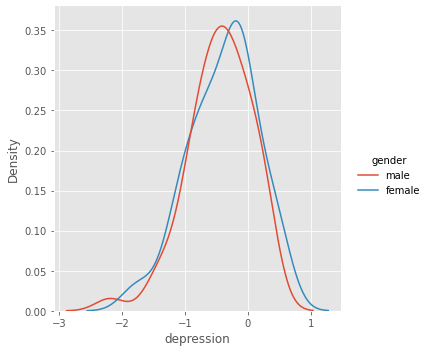

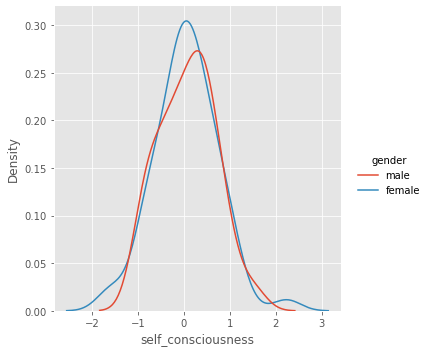

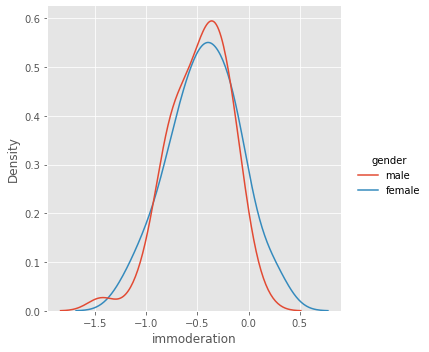

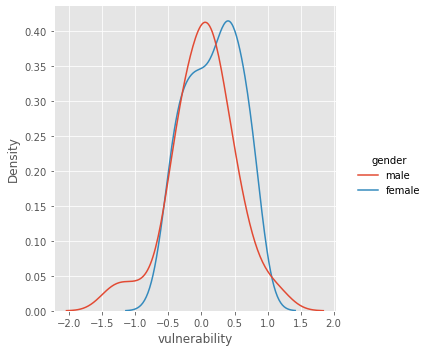

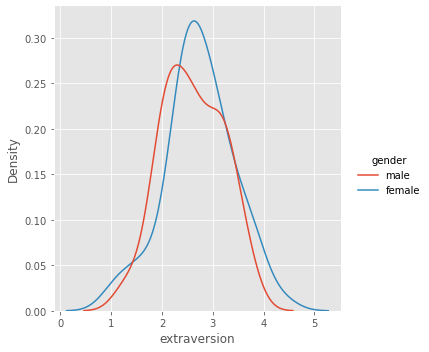

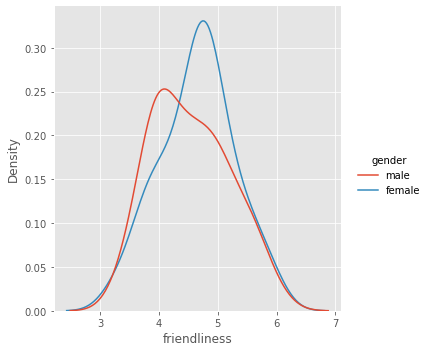

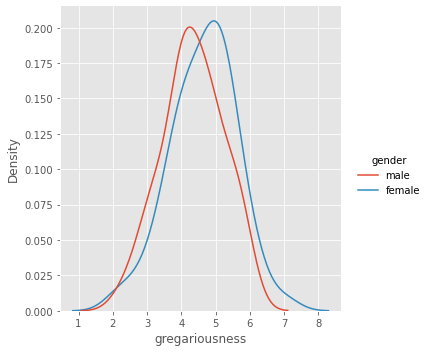

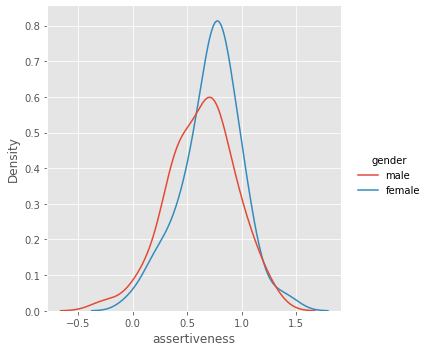

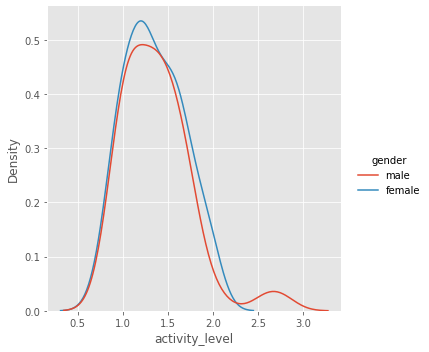

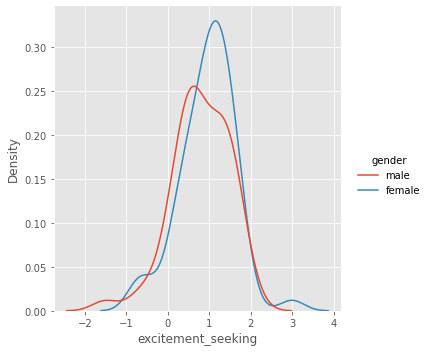

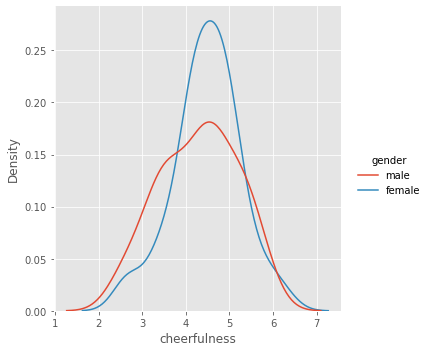

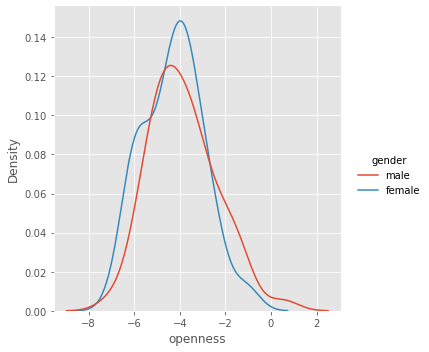

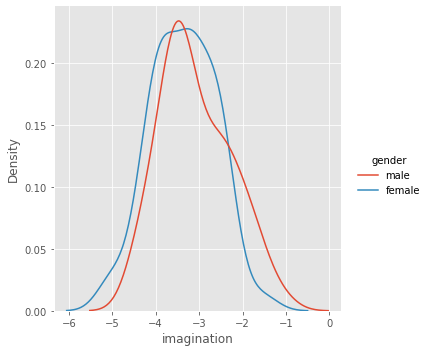

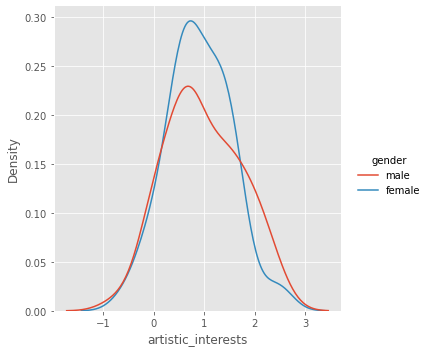

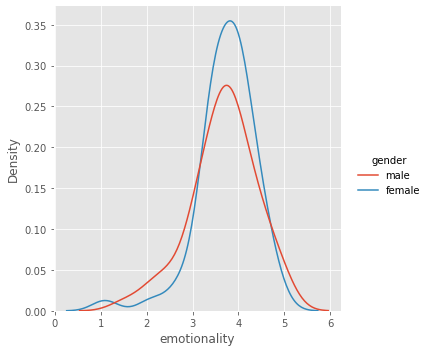

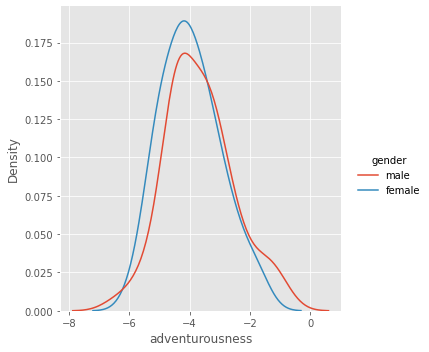

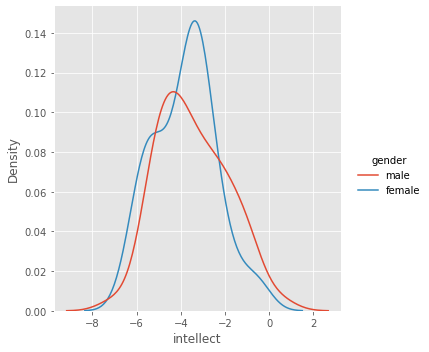

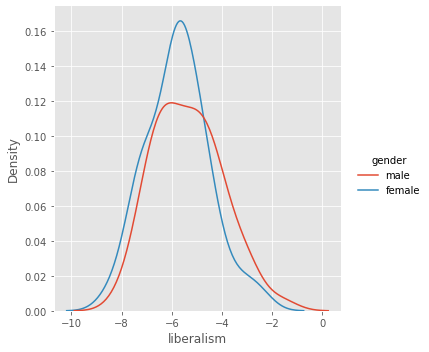

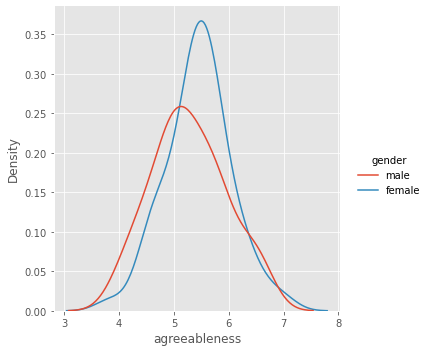

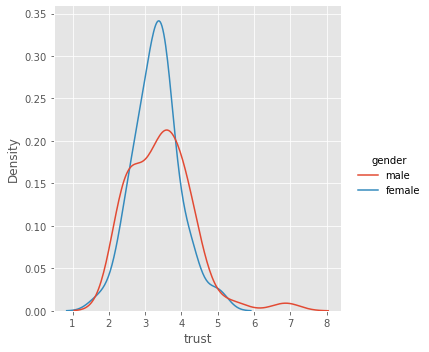

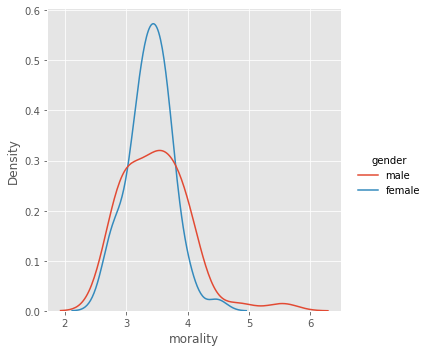

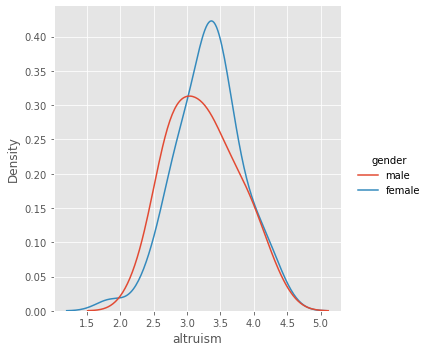

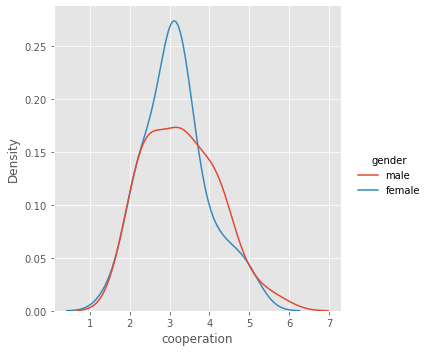

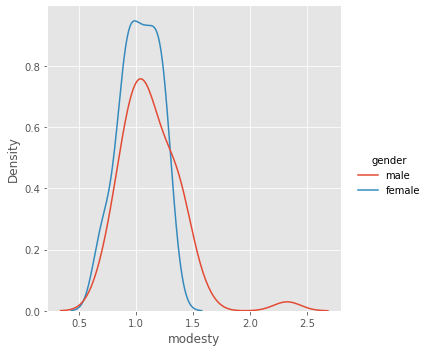

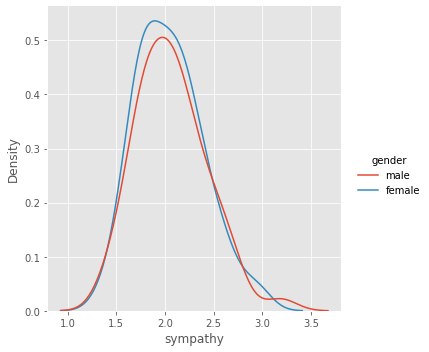

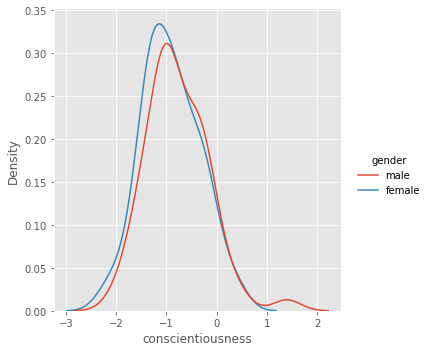

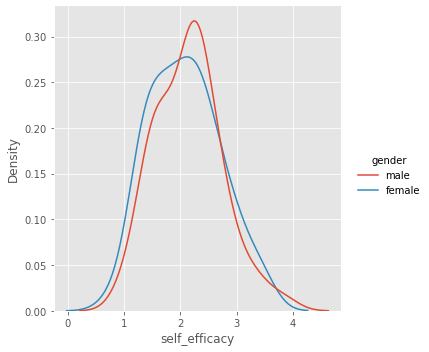

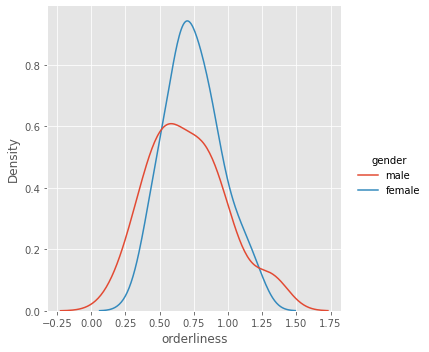

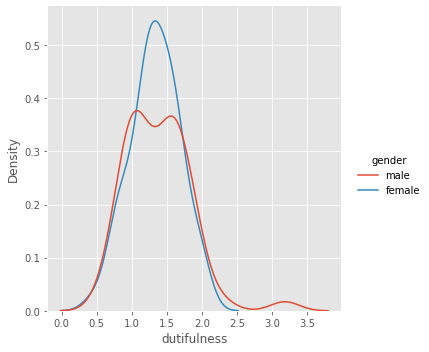

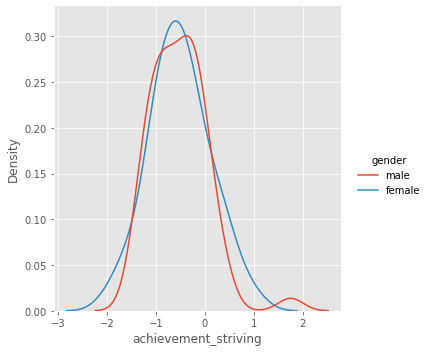

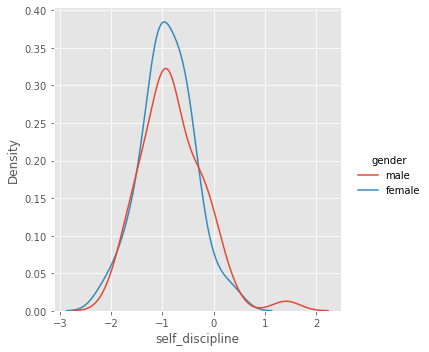

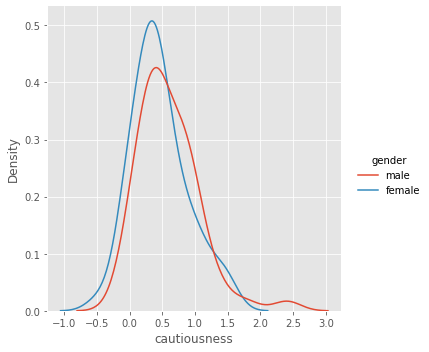

In [35]:
for i, attr in enumerate(PERSONALITY_ATTRS):
    sns.displot(male_female_politician_personality, x=attr, hue='gender', kind='kde')

In [117]:
overall_male_poli_personality = male_politician_personality.mean(axis=0)
overall_female_poli_personality = female_politician_personality.mean(axis=0)

In [118]:
overall_poli_personality = pd.DataFrame([overall_male_poli_personality, overall_female_poli_personality], index=['male', 'female'])

In [119]:
overall_poli_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
male,0.672567,0.567041,1.893100,-0.261376,1.031421,0.031199,0.765722,1.719917,4.730162,4.298065,...,3.073951,2.905384,2.927682,-0.441119,2.304660,0.309901,2.000856,-0.620751,0.176624,0.621410
female,0.808964,0.771522,2.042122,-0.121198,0.961665,0.194246,0.964479,1.929378,4.802814,4.634986,...,2.826048,2.953691,2.912474,-0.589271,2.215861,0.296113,1.857900,-0.611906,0.117222,0.429357


<AxesSubplot:>

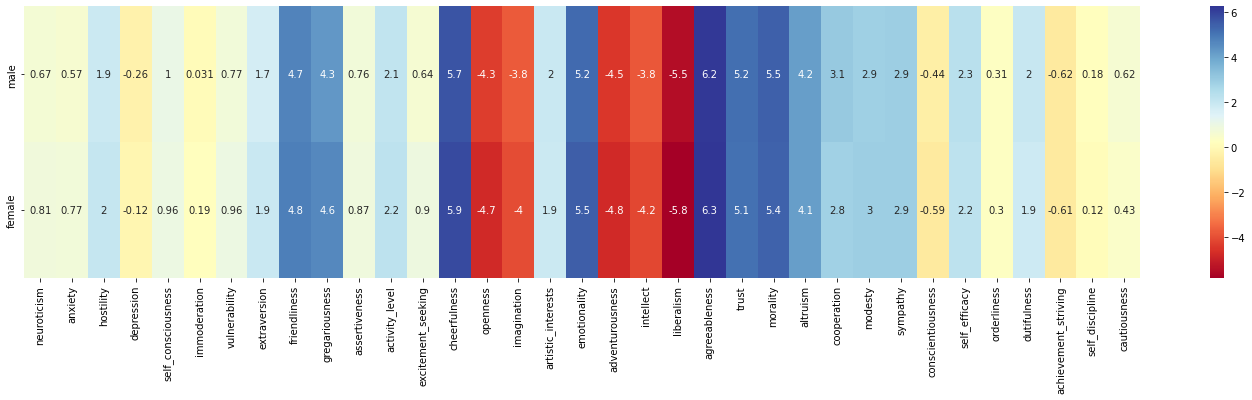

In [120]:
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(overall_poli_personality, ax=ax, annot=True, cmap='RdYlBu')

In [122]:
male_speakers_df.quotations.apply(lambda q: len(q))

2267061    5000
18         5000
7926268    5000
4545725    5000
2864       5000
           ... 
1148349    5000
2541186    5000
4537156    5000
1925       5000
6803982    5000
Name: quotations, Length: 100, dtype: int64

In [131]:
male_personality['speaker'] = male_speakers_df['label'].values
female_personality['speaker'] = female_speakers_df['label'].values

In [136]:
male_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness,speaker
0,1.008680,0.087084,2.008303,0.251061,0.883197,-0.291348,-0.329182,2.407586,3.752901,3.221153,...,1.109161,2.037928,-1.393528,1.738749,0.155109,0.897160,-1.033399,-1.492122,0.113124,Donald Trump
1,0.585742,0.814411,1.633016,-0.745025,-0.381548,-0.673199,0.495539,3.205566,5.600305,5.839802,...,1.223866,2.046359,-0.360656,2.115135,0.991918,1.736866,-0.024171,-0.365307,0.793900,Narendra Modi
2,0.764701,0.714746,1.707321,-0.509001,-0.405116,-0.490324,0.560831,3.768752,5.164491,5.549955,...,0.928968,2.145890,-0.993324,2.167642,0.764476,1.380738,-0.656691,-0.776928,0.328758,Barack Obama
3,1.218041,0.824462,2.134823,0.327672,-0.075985,-0.152296,0.109224,3.371638,4.835026,4.302235,...,1.018367,2.570419,-1.451605,1.882487,0.377733,0.723202,-1.230882,-1.082649,0.066152,Francis
4,-0.001605,0.095598,1.312930,-0.478909,-0.962020,-0.362678,-0.302766,4.223598,6.524683,7.110118,...,1.320037,1.940929,-0.544093,1.990219,0.526058,1.892022,-0.339600,-0.346783,0.106832,Jürgen Klopp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.595905,-0.100842,1.651182,-0.412188,0.986808,-0.680155,-0.079071,1.925947,4.092101,3.320006,...,1.132648,2.203059,-0.937277,2.390094,0.413079,1.593396,-0.329233,-0.950227,0.832389,Will Schuester
96,0.747204,0.751382,1.721429,-0.256974,-0.372413,-0.239105,0.583751,3.679907,5.420812,6.516390,...,1.081951,1.702275,-0.844453,1.621738,0.964070,1.302867,-0.730878,-0.772464,0.222137,Scott Walker
97,0.726845,0.698842,1.784515,-0.039580,-0.330463,-0.338640,0.656440,3.593777,4.859913,5.682489,...,0.794718,1.914544,-1.068886,1.785456,0.811722,1.071635,-0.621780,-0.936686,0.208900,Uhuru Kenyatta
98,0.759510,0.495611,1.728926,-0.048210,0.808973,-0.149087,0.475268,2.378779,4.088129,4.738818,...,1.009196,1.534206,-1.159955,1.327087,0.649157,1.089940,-0.227045,-1.007872,0.402118,John Kasich


In [139]:
female_personality[female_personality.speaker == 'Hillary Clinton'].squeeze()

neuroticism                    0.439672
anxiety                       -0.256012
hostility                      1.579229
depression                    -0.629634
self_consciousness            -0.627953
immoderation                  -0.150898
vulnerability                 -0.433582
extraversion                   2.552137
friendliness                   4.611782
gregariousness                 3.875354
assertiveness                  0.830306
activity_level                 1.219364
excitement_seeking             1.271868
cheerfulness                   3.602541
openness                      -2.613357
imagination                   -2.420351
artistic_interests             0.954321
emotionality                   3.496692
adventurousness               -2.595296
intellect                      -2.47548
liberalism                    -4.560538
agreeableness                  4.675417
trust                          3.258637
morality                       3.486086
altruism                       2.782316


In [144]:
hillary_trump = pd.DataFrame([female_personality[female_personality.speaker == 'Hillary Clinton'].squeeze(), male_personality[male_personality.speaker == 'Donald Trump'].squeeze()]).set_index('speaker')

<AxesSubplot:ylabel='speaker'>

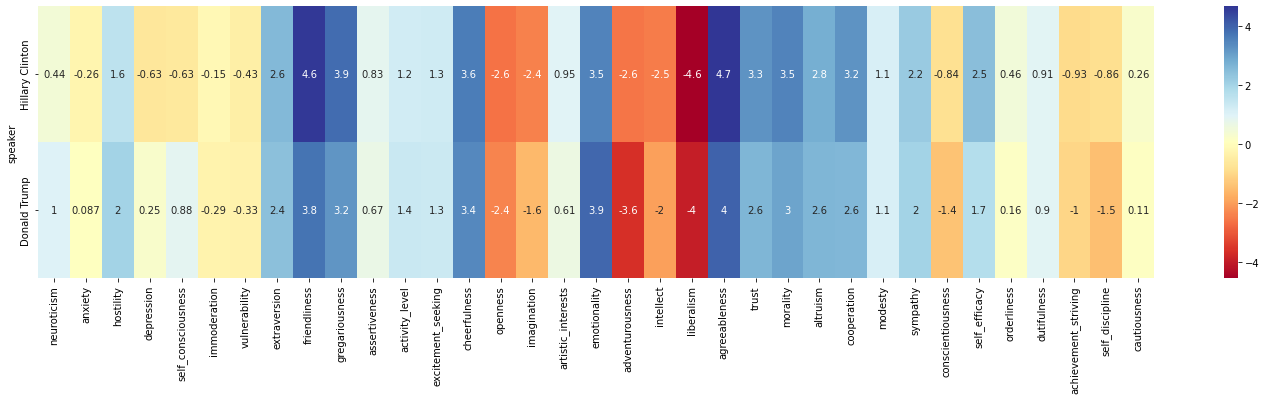

In [145]:
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(hillary_trump, ax=ax, annot=True, cmap='RdYlBu')